In [1]:
import sys
sys.path.append("../")
import numpy as np 
from utils import *
from lattice import *
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensornetwork as tn

In [2]:
ls ../array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3000/1_mel_Adam/lr_0.001_epoch_2000/

H/            loss_0.16353/ loss_0.16817/ loss_0.18708/ loss_0.21895/
loss_0.15997/ loss_0.16354/ loss_0.16960/ loss_0.19561/ loss_0.22164/
loss_0.16000/ loss_0.16355/ loss_0.16986/ loss_0.20366/ loss_0.22455/
loss_0.16001/ loss_0.16356/ loss_0.17001/ loss_0.21412/ loss_0.22546/
loss_0.16002/ loss_0.16557/ loss_0.17027/ loss_0.21444/ loss_0.25546/
loss_0.16003/ loss_0.16581/ loss_0.17071/ loss_0.21446/ loss_0.26596/
loss_0.16006/ loss_0.16714/ loss_0.17072/ loss_0.21451/ loss_0.26765/
loss_0.16015/ loss_0.16717/ loss_0.17089/ loss_0.21454/
loss_0.16017/ loss_0.16785/ loss_0.17193/ loss_0.21519/
loss_0.16351/ loss_0.16807/ loss_0.17319/ loss_0.21526/


In [7]:
path_with_lowest_loss

<function utils.run_sim.path_with_lowest_loss(parent_dir, return_ham=False, absolute_path=False, only_ham=False)>

In [15]:
sps = 8
bd = 2
res = []
for seed in range(0, 5000):
    parent_dir = f"../array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_2000"
    try:
        u_path, lv, h = path_with_lowest_loss(parent_dir, return_ham=True)
        print(u_path, h)
        u = np.load(u_path + "/0.npy")
        h = np.load(h + "/0.npy")
    except:
        
#         print(f"there are no matrix under the path = {parent_dir}")
        continue
#     print(u_path)
    A = FF.block1D(bd, sps, bd, seed=seed)
    A_ = A.transpose(1,0,2)
    A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
    sle = np.sort(np.linalg.eigvals(A_tilde))[::-1]
#     print(sle.real)
    A2 = np.einsum("ijk,klm->jlim", A, A).reshape(sps**2, bd**2)
    U, s , V = np.linalg.svd(A2)
    Up = U[:, len(s):]
    h = Up @ Up.T
    max_gap = 0
    for L in range(3,4):
        H = sum_ham(h, [[i, (i + 1) % L] for i in range(L)], L, sps)
        E = np.linalg.eigvalsh(H)
        gap = E[1] - E[0]
        max_gap = max(gap, max_gap)
#         print(max_gap, seed)
    e = np.linalg.eigvalsh(h)
#     h = np.load(f"../array/torch/FF1D_s4/s_4_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_8000/H/0.npy")
    U = np.kron(u,u)
    hu = U @ h @ U.T
    
    res.append({
        "seed" : seed,
        "E" : np.linalg.eigvalsh(H),
        "loss" : lv,
        "gap" : max_gap,
        "gap_loc" : e[1] - e[0],
        "gap_transfer" : sle.real[0] - sle.real[1],
        "n_0" : np.sum(np.round(hu,5) == 0)
    })
    print(f"finish seed = {seed}")

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3000/1_mel_Adam/lr_0.001_epoch_2000/loss_0.15997/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3000/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3000
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3001/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08733/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3001/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3001
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3002/1_mel_Adam/lr_0.001_epoch_2000/loss_0.06021/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3002/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3002
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_se

finish seed = 3019
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3020/1_mel_Adam/lr_0.001_epoch_2000/loss_0.12912/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3020/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3020
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3021/1_mel_Adam/lr_0.001_epoch_2000/loss_0.09354/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3021/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3021
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3022/1_mel_Adam/lr_0.001_epoch_2000/loss_0.15732/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3022/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3022
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3037
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3038/1_mel_Adam/lr_0.001_epoch_2000/loss_0.06933/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3038/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3038
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3039/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18129/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3039/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3039
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3040/1_mel_Adam/lr_0.001_epoch_2000/loss_0.06812/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3040/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3040
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3057
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3058/1_mel_Adam/lr_0.001_epoch_2000/loss_0.10735/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3058/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3058
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3059/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18932/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3059/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3059
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3060/1_mel_Adam/lr_0.001_epoch_2000/loss_0.05261/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3060/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3060
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3074
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3075/1_mel_Adam/lr_0.001_epoch_2000/loss_0.01797/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3075/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3075
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3076/1_mel_Adam/lr_0.001_epoch_2000/loss_0.17025/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3076/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3076
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3077/1_mel_Adam/lr_0.001_epoch_2000/loss_0.05146/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3077/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3077
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3093
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3094/1_mel_Adam/lr_0.001_epoch_2000/loss_0.23475/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3094/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3094
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3095/1_mel_Adam/lr_0.001_epoch_2000/loss_0.03543/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3095/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3095
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3096/1_mel_Adam/lr_0.001_epoch_2000/loss_0.11225/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3096/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3096
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3112
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3113/1_mel_Adam/lr_0.001_epoch_2000/loss_0.13915/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3113/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3113
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3114/1_mel_Adam/lr_0.001_epoch_2000/loss_0.01661/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3114/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3114
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3115/1_mel_Adam/lr_0.001_epoch_2000/loss_0.03607/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3115/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3115
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3131
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3132/1_mel_Adam/lr_0.001_epoch_2000/loss_0.03118/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3132/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3132
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3133/1_mel_Adam/lr_0.001_epoch_2000/loss_0.04979/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3133/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3133
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3134/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08285/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3134/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3134
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3150/1_mel_Adam/lr_0.001_epoch_2000/loss_0.14196/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3150/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3150
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3151/1_mel_Adam/lr_0.001_epoch_2000/loss_0.16897/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3151/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3151
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3152/1_mel_Adam/lr_0.001_epoch_2000/loss_0.12175/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3152/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3152
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_se

finish seed = 3168
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3169/1_mel_Adam/lr_0.001_epoch_2000/loss_0.15667/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3169/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3169
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3170/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08015/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3170/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3170
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3171/1_mel_Adam/lr_0.001_epoch_2000/loss_0.22737/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3171/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3171
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3187
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3188/1_mel_Adam/lr_0.001_epoch_2000/loss_0.22876/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3188/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3188
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3189/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08982/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3189/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3189
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3190/1_mel_Adam/lr_0.001_epoch_2000/loss_0.20084/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3190/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3190
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3204
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3205/1_mel_Adam/lr_0.001_epoch_2000/loss_0.24230/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3205/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3205
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3206/1_mel_Adam/lr_0.001_epoch_2000/loss_0.15641/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3206/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3206
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3207/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18210/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3207/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3207
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3223/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18186/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3223/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3223
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3224/1_mel_Adam/lr_0.001_epoch_2000/loss_0.06042/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3224/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3224
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3225/1_mel_Adam/lr_0.001_epoch_2000/loss_0.04174/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3225/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3225
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_se

finish seed = 3241
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3242/1_mel_Adam/lr_0.001_epoch_2000/loss_0.04473/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3242/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3242
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3243/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18460/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3243/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3243
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3244/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18826/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3244/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3244
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3260
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3261/1_mel_Adam/lr_0.001_epoch_2000/loss_0.16475/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3261/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3261
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3262/1_mel_Adam/lr_0.001_epoch_2000/loss_0.23177/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3262/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3262
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3263/1_mel_Adam/lr_0.001_epoch_2000/loss_0.16119/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3263/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3263
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3277
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3278/1_mel_Adam/lr_0.001_epoch_2000/loss_0.02550/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3278/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3278
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3279/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18556/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3279/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3279
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3280/1_mel_Adam/lr_0.001_epoch_2000/loss_0.17386/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3280/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3280
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3294
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3295/1_mel_Adam/lr_0.001_epoch_2000/loss_0.23106/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3295/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3295
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3296/1_mel_Adam/lr_0.001_epoch_2000/loss_0.15081/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3296/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3296
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3297/1_mel_Adam/lr_0.001_epoch_2000/loss_0.09078/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3297/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3297
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3311
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3312/1_mel_Adam/lr_0.001_epoch_2000/loss_0.20369/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3312/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3312
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3313/1_mel_Adam/lr_0.001_epoch_2000/loss_0.12370/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3313/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3313
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3314/1_mel_Adam/lr_0.001_epoch_2000/loss_0.16235/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3314/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3314
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3331
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3332/1_mel_Adam/lr_0.001_epoch_2000/loss_0.17386/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3332/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3332
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3333/1_mel_Adam/lr_0.001_epoch_2000/loss_0.02352/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3333/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3333
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3334/1_mel_Adam/lr_0.001_epoch_2000/loss_0.09512/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3334/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3334
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3349
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3350/1_mel_Adam/lr_0.001_epoch_2000/loss_0.17339/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3350/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3350
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3351/1_mel_Adam/lr_0.001_epoch_2000/loss_0.13031/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3351/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3351
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3352/1_mel_Adam/lr_0.001_epoch_2000/loss_0.12774/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3352/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3352
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3368
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3369/1_mel_Adam/lr_0.001_epoch_2000/loss_0.10586/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3369/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3369
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3370/1_mel_Adam/lr_0.001_epoch_2000/loss_0.11900/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3370/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3370
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3371/1_mel_Adam/lr_0.001_epoch_2000/loss_0.22609/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3371/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3371
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3387
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3388/1_mel_Adam/lr_0.001_epoch_2000/loss_0.14177/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3388/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3388
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3389/1_mel_Adam/lr_0.001_epoch_2000/loss_0.16030/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3389/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3389
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3390/1_mel_Adam/lr_0.001_epoch_2000/loss_0.17849/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3390/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3390
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3405
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3406/1_mel_Adam/lr_0.001_epoch_2000/loss_0.14558/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3406/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3406
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3407/1_mel_Adam/lr_0.001_epoch_2000/loss_0.24585/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3407/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3407
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3408/1_mel_Adam/lr_0.001_epoch_2000/loss_0.20690/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3408/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3408
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3422
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3423/1_mel_Adam/lr_0.001_epoch_2000/loss_0.04420/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3423/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3423
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3424/1_mel_Adam/lr_0.001_epoch_2000/loss_0.21962/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3424/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3424
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3425/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08776/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3425/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3425
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3439
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3440/1_mel_Adam/lr_0.001_epoch_2000/loss_0.20312/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3440/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3440
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3441/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18642/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3441/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3441
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3442/1_mel_Adam/lr_0.001_epoch_2000/loss_0.12008/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3442/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3442
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3458
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3459/1_mel_Adam/lr_0.001_epoch_2000/loss_0.22965/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3459/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3459
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3460/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08122/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3460/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3460
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3461/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18620/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3461/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3461
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3476
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3477/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18194/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3477/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3477
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3478/1_mel_Adam/lr_0.001_epoch_2000/loss_0.14774/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3478/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3478
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3479/1_mel_Adam/lr_0.001_epoch_2000/loss_0.00718/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3479/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3479
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3495
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3496/1_mel_Adam/lr_0.001_epoch_2000/loss_0.24123/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3496/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3496
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3497/1_mel_Adam/lr_0.001_epoch_2000/loss_0.19836/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3497/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3497
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3498/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08198/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3498/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3498
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3515
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3516/1_mel_Adam/lr_0.001_epoch_2000/loss_0.04924/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3516/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3516
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3517/1_mel_Adam/lr_0.001_epoch_2000/loss_0.04425/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3517/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3517
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3518/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18033/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3518/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3518
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3532
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3533/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18559/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3533/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3533
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3534/1_mel_Adam/lr_0.001_epoch_2000/loss_0.14013/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3534/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3534
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3535/1_mel_Adam/lr_0.001_epoch_2000/loss_0.11853/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3535/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3535
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3550
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3551/1_mel_Adam/lr_0.001_epoch_2000/loss_0.19434/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3551/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3551
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3552/1_mel_Adam/lr_0.001_epoch_2000/loss_0.15065/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3552/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3552
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3553/1_mel_Adam/lr_0.001_epoch_2000/loss_0.23915/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3553/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3553
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3568
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3569/1_mel_Adam/lr_0.001_epoch_2000/loss_0.24561/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3569/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3569
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3570/1_mel_Adam/lr_0.001_epoch_2000/loss_0.13206/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3570/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3570
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3571/1_mel_Adam/lr_0.001_epoch_2000/loss_0.10781/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3571/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3571
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3588
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3589/1_mel_Adam/lr_0.001_epoch_2000/loss_0.15888/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3589/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3589
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3590/1_mel_Adam/lr_0.001_epoch_2000/loss_0.04132/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3590/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3590
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3591/1_mel_Adam/lr_0.001_epoch_2000/loss_0.16813/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3591/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3591
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3605
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3606/1_mel_Adam/lr_0.001_epoch_2000/loss_0.13620/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3606/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3606
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3607/1_mel_Adam/lr_0.001_epoch_2000/loss_0.13289/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3607/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3607
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3608/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08399/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3608/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3608
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3622
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3623/1_mel_Adam/lr_0.001_epoch_2000/loss_0.07573/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3623/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3623
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3624/1_mel_Adam/lr_0.001_epoch_2000/loss_0.14015/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3624/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3624
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3625/1_mel_Adam/lr_0.001_epoch_2000/loss_0.10138/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3625/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3625
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3641/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08548/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3641/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3641
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3642/1_mel_Adam/lr_0.001_epoch_2000/loss_0.06208/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3642/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3642
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3643/1_mel_Adam/lr_0.001_epoch_2000/loss_0.07566/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3643/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3643
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_se

finish seed = 3661
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3662/1_mel_Adam/lr_0.001_epoch_2000/loss_0.07239/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3662/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3662
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3663/1_mel_Adam/lr_0.001_epoch_2000/loss_0.10681/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3663/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3663
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3664/1_mel_Adam/lr_0.001_epoch_2000/loss_0.15221/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3664/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3664
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3680
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3681/1_mel_Adam/lr_0.001_epoch_2000/loss_0.23688/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3681/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3681
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3682/1_mel_Adam/lr_0.001_epoch_2000/loss_0.09025/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3682/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3682
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3683/1_mel_Adam/lr_0.001_epoch_2000/loss_0.21049/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3683/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3683
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3700/1_mel_Adam/lr_0.001_epoch_2000/loss_0.17467/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3700/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3700
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3701/1_mel_Adam/lr_0.001_epoch_2000/loss_0.11011/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3701/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3701
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3702/1_mel_Adam/lr_0.001_epoch_2000/loss_0.03952/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3702/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3702
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_se

finish seed = 3718
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3719/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18097/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3719/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3719
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3720/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18388/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3720/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3720
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3721/1_mel_Adam/lr_0.001_epoch_2000/loss_0.21368/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3721/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3721
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3737
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3738/1_mel_Adam/lr_0.001_epoch_2000/loss_0.04490/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3738/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3738
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3739/1_mel_Adam/lr_0.001_epoch_2000/loss_0.13197/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3739/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3739
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3740/1_mel_Adam/lr_0.001_epoch_2000/loss_0.15610/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3740/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3740
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3757
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3758/1_mel_Adam/lr_0.001_epoch_2000/loss_0.12548/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3758/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3758
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3759/1_mel_Adam/lr_0.001_epoch_2000/loss_0.15023/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3759/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3759
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3760/1_mel_Adam/lr_0.001_epoch_2000/loss_0.22417/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3760/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3760
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3776
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3777/1_mel_Adam/lr_0.001_epoch_2000/loss_0.05588/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3777/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3777
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3778/1_mel_Adam/lr_0.001_epoch_2000/loss_0.07782/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3778/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3778
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3779/1_mel_Adam/lr_0.001_epoch_2000/loss_0.20437/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3779/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3779
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3794
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3795/1_mel_Adam/lr_0.001_epoch_2000/loss_0.16389/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3795/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3795
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3796/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08531/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3796/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3796
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3797/1_mel_Adam/lr_0.001_epoch_2000/loss_0.15178/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3797/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3797
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3811
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3812/1_mel_Adam/lr_0.001_epoch_2000/loss_0.20259/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3812/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3812
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3813/1_mel_Adam/lr_0.001_epoch_2000/loss_0.22550/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3813/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3813
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3814/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18979/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3814/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3814
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3832
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3833/1_mel_Adam/lr_0.001_epoch_2000/loss_0.22745/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3833/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3833
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3834/1_mel_Adam/lr_0.001_epoch_2000/loss_0.25376/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3834/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3834
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3835/1_mel_Adam/lr_0.001_epoch_2000/loss_0.04018/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3835/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3835
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3849
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3850/1_mel_Adam/lr_0.001_epoch_2000/loss_0.05052/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3850/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3850
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3851/1_mel_Adam/lr_0.001_epoch_2000/loss_0.06661/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3851/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3851
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3852/1_mel_Adam/lr_0.001_epoch_2000/loss_0.21178/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3852/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3852
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3868
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3869/1_mel_Adam/lr_0.001_epoch_2000/loss_0.18072/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3869/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3869
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3870/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08420/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3870/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3870
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3871/1_mel_Adam/lr_0.001_epoch_2000/loss_0.12305/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3871/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3871
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3887
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3888/1_mel_Adam/lr_0.001_epoch_2000/loss_0.20490/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3888/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3888
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3889/1_mel_Adam/lr_0.001_epoch_2000/loss_0.16501/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3889/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3889
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3890/1_mel_Adam/lr_0.001_epoch_2000/loss_0.05470/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3890/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3890
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3907
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3908/1_mel_Adam/lr_0.001_epoch_2000/loss_0.05273/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3908/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3908
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3909/1_mel_Adam/lr_0.001_epoch_2000/loss_0.17249/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3909/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3909
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3910/1_mel_Adam/lr_0.001_epoch_2000/loss_0.19479/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3910/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3910
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3924
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3925/1_mel_Adam/lr_0.001_epoch_2000/loss_0.14044/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3925/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3925
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3926/1_mel_Adam/lr_0.001_epoch_2000/loss_0.07898/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3926/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3926
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3927/1_mel_Adam/lr_0.001_epoch_2000/loss_0.04373/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3927/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3927
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3942
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3943/1_mel_Adam/lr_0.001_epoch_2000/loss_0.11564/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3943/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3943
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3944/1_mel_Adam/lr_0.001_epoch_2000/loss_0.12117/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3944/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3944
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3945/1_mel_Adam/lr_0.001_epoch_2000/loss_0.14153/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3945/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3945
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3959
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3960/1_mel_Adam/lr_0.001_epoch_2000/loss_0.17940/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3960/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3960
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3961/1_mel_Adam/lr_0.001_epoch_2000/loss_0.17117/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3961/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3961
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3962/1_mel_Adam/lr_0.001_epoch_2000/loss_0.11596/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3962/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3962
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3977
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3978/1_mel_Adam/lr_0.001_epoch_2000/loss_0.11470/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3978/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3978
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3979/1_mel_Adam/lr_0.001_epoch_2000/loss_0.10864/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3979/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3979
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3980/1_mel_Adam/lr_0.001_epoch_2000/loss_0.07014/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3980/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3980
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

finish seed = 3994
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3995/1_mel_Adam/lr_0.001_epoch_2000/loss_0.11065/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3995/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3995
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3996/1_mel_Adam/lr_0.001_epoch_2000/loss_0.11882/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3996/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3996
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3997/1_mel_Adam/lr_0.001_epoch_2000/loss_0.08411/u /Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/s_8_r_2_lt_1_d_1_seed_3997/1_mel_Adam/lr_0.001_epoch_2000/H
finish seed = 3997
/Users/keisukemurota/Documents/todo/worms/python/rmsKit/array/torch/FF1D_8/

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(res)

### raw data

- Are loss for low gapped data necessarily small?
    - If so, below how many energy gap?
- Should it behave like linear? If so, theorically optimize the outliers upto emperical line?
 

In [39]:
np.log10

<ufunc 'log10'>

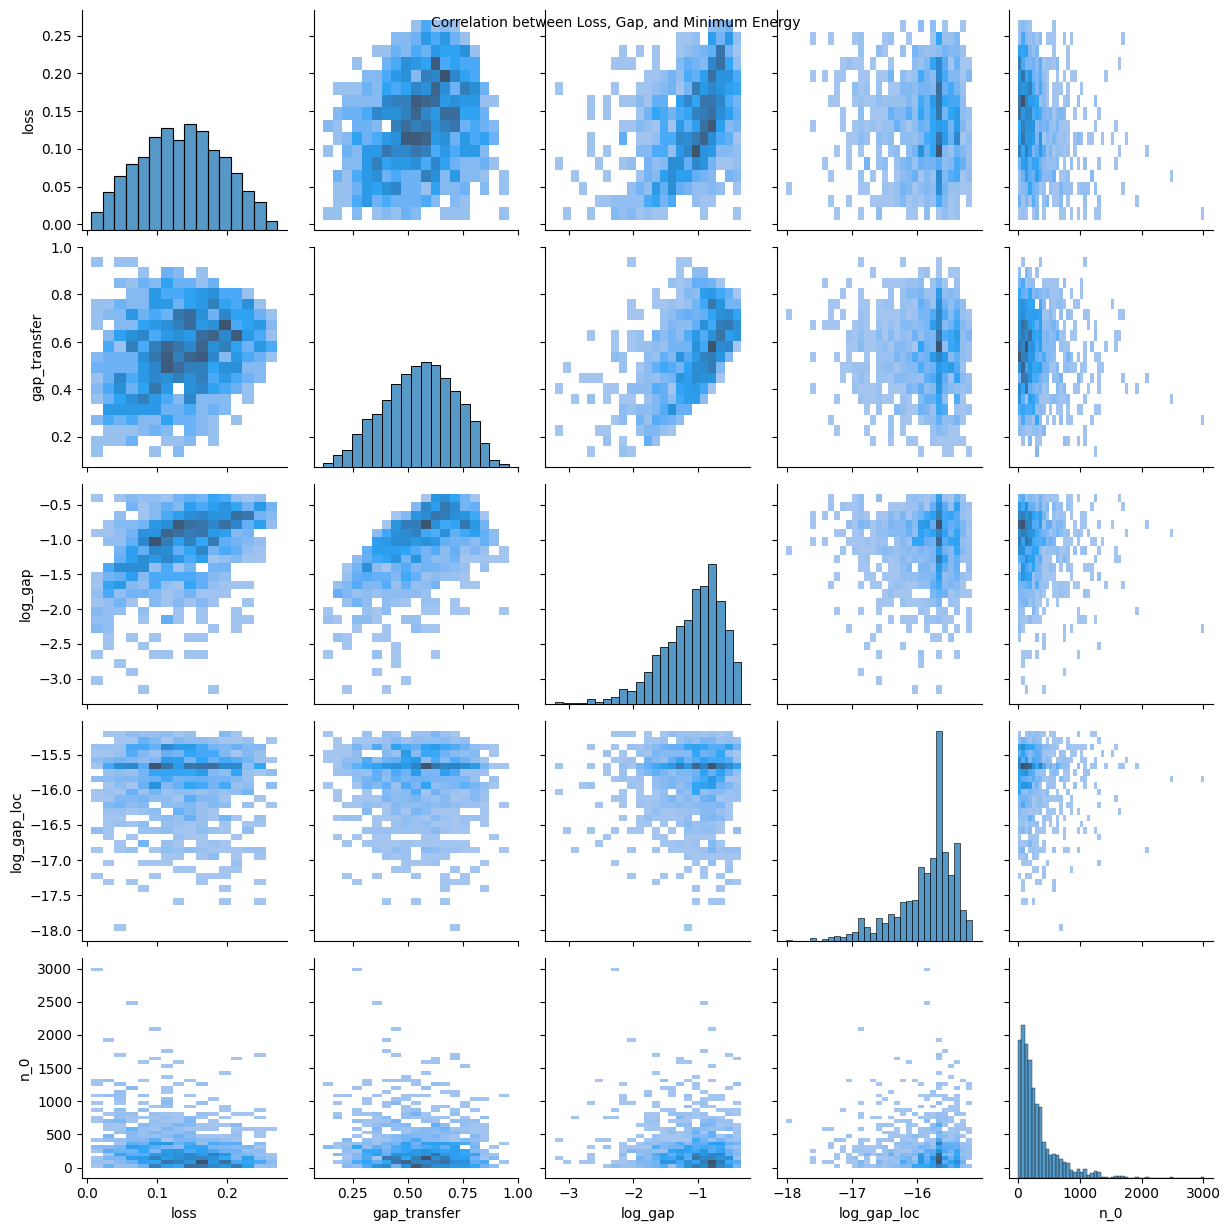

In [40]:
df = pd.DataFrame(res)
df['min_energy'] = df['E'].apply(lambda x: x[1])
df["log_gap"] = df.gap.apply(np.log10)
df["log_gap_loc"] = df.gap_loc.apply(np.log10)
df["log_loss"] = df.loss.apply(lambda x: np.log10(x+0.0001))
# Create a pairplot to visualize the correlations between loss, gap, and minimum energy.
sns.pairplot(df[['loss', 'gap_transfer', "log_gap", "log_gap_loc", "n_0"]] , kind='hist')

# Set titles and labels.
plt.suptitle('Correlation between Loss, Gap, and Minimum Energy', size=10)
plt.show()

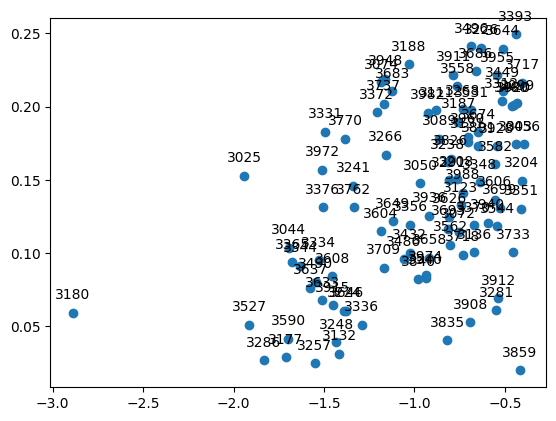

In [41]:
import matplotlib.pyplot as plt
sample_df = df.sample(100)
plt.scatter(sample_df['log_gap'], sample_df['loss'])  # Plot each point
for i in range(len(sample_df)):
    plt.annotate(sample_df['seed'].iloc[i],  # This is the text to display
                 (sample_df['log_gap'].iloc[i], sample_df['loss'].iloc[i]),  # This is the point to which the text is annotated
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

plt.show()

In [21]:
sorted_df = df.sort_values(by='n_0')
sorted_df[["loss", "n_0", "gap"]][df.n_0 == 0]

/var/folders/z7/m5qzz0hj12z06hxsn5km2c400000gn/T/ipykernel_2828/2420113439.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[["loss", "n_0", "gap"]][df.n_0 == 0]


,loss,n_0,gap
344,0.09117,0,0.023403
836,0.03787,0,0.014923
515,0.22500,0,0.219528
419,0.15477,0,0.100377
452,0.15572,0,0.115397
459,0.22965,0,0.184486
827,0.18594,0,0.412190
171,0.22737,0,0.240718
65,0.25693,0,0.199080
721,0.21368,0,0.241363


## MG

In [33]:
Sz = np.zeros([2,2])
Sz[0,0] = 1/2
Sz[1,1] = -1/2
Sx = np.zeros([2,2])
Sx[1,0] = 1/2
Sx[0,1] = 1/2
Sy = np.zeros([2,2], dtype=np.complex64)
Sy[1,0] = 1j/2
Sy[0,1] = -1j/2


SzSz = np.kron(Sz,Sz).real.astype(np.float64)
SxSx = np.kron(Sx,Sx).real.astype(np.float64)
SySy = np.kron(Sy,Sy).real.astype(np.float64)

lh = SzSz + SxSx + SySy

# lh = -lh # use minus of local hamiltonian for monte-carlo (exp(-beta H ))

bonds = [[0,1], [0, 2], [1, 2]]
lh2 = sum_ham(lh/2, bonds, 3, 2)
LH = sum_ham(lh2/2, [[0,1,2], [3, 4, 5]], 6, 2) + sum_ham(lh2, [[1, 2, 3], [2, 3, 4]], 6, 2)
# LH = sum_ham(LH/2, [[0, 1], [2, 3]], 4, 8) + sum_ham(LH, [[1, 2]], 4, 8)
lh = LH


In [55]:
L = 4
H = sum_ham(lh, [[i, (i+1)%L] for i in range(L)], L, 8)
E = np.linalg.eigvalsh(H)
E -= E[0]
E /= E[-1]

### Confirm MG has double folded gs

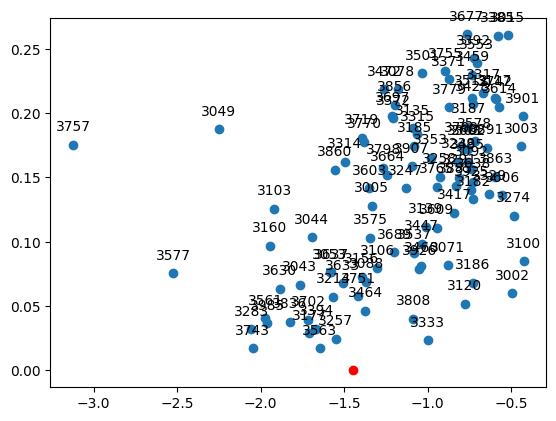

In [56]:
dE = E[2] - E[0]

import matplotlib.pyplot as plt
sample_df = df.sample(100)
plt.scatter(sample_df['log_gap'], sample_df['loss'])  # Plot each point
for i in range(len(sample_df)):
    plt.annotate(sample_df['seed'].iloc[i],  # This is the text to display
                 (sample_df['log_gap'].iloc[i], sample_df['loss'].iloc[i]),  # This is the point to which the text is annotated
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

plt.scatter(x=[np.log10(dE)], y = [0], color = "red", label = "MG")
plt.show()